**Spam Detection**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

**Steps**
- Data Wrangling
- Exploratory Data Analysis
- Text Preprocessing
- Model development
- Evaluation
- Improvement
- Deployment


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**1.Data Cleaning**

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.columns = ['Y','Text']

In [6]:
df.head(2)

,Y,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Y'] = encoder.fit_transform(df['Y'])
df.head(2)

,Y,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [9]:
df.isnull().sum()

Y       0
Text    0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

**2. Exploratory Data Analysis**

In [14]:
df['Y'].value_counts()

Y
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

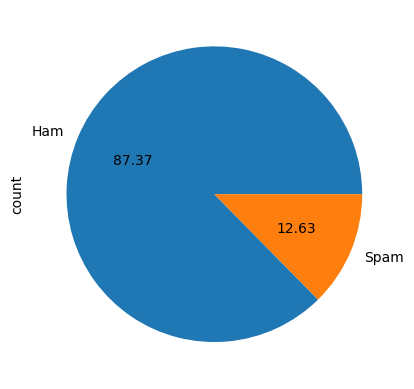

In [16]:
df['Y'].value_counts().plot(kind='pie',labels = ['Ham','Spam'],autopct = '%0.2f')

In [17]:
!pip install nltk



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk


In [19]:
#nltk.download('punkt')

In [20]:
df['#_of_Char'] = df['Text'].apply(len)

In [21]:
df.head(2)

,Y,Text,#_of_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [22]:
df['#_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df['#_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head(2)

,Y,Text,#_of_Char,#_of_words,#_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [25]:
df[['#_of_Char','#_of_words','#_of_sent']].describe()

,#_of_Char,#_of_words,#_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Y'] == 0][['#_of_Char','#_of_words','#_of_sent']].describe()

,#_of_Char,#_of_words,#_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['Y'] == 1][['#_of_Char','#_of_words','#_of_sent']].describe()


,#_of_Char,#_of_words,#_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns


<Axes: xlabel='#_of_Char', ylabel='Count'>

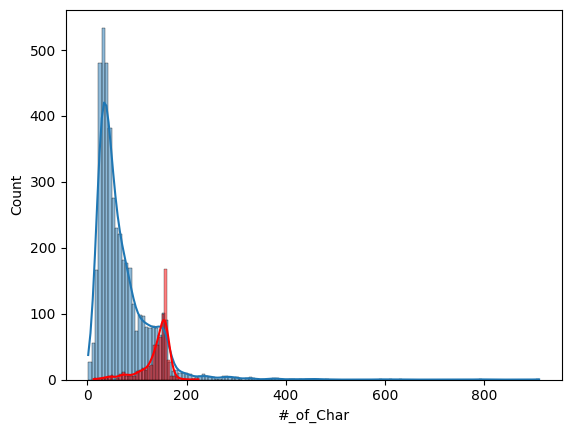

In [29]:
sns.histplot(df[df['Y'] == 0]['#_of_Char'],kde=True,)
sns.histplot(df[df['Y'] == 1]['#_of_Char'],kde=True,color='r')


<Axes: xlabel='#_of_words', ylabel='Count'>

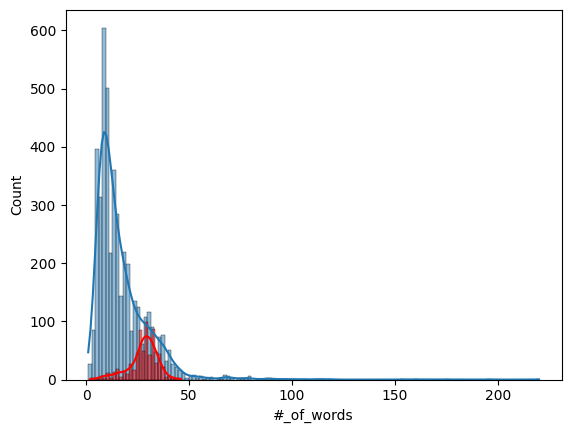

In [30]:
sns.histplot(df[df['Y'] == 0]['#_of_words'],kde=True,)
sns.histplot(df[df['Y'] == 1]['#_of_words'],kde=True,color='r')

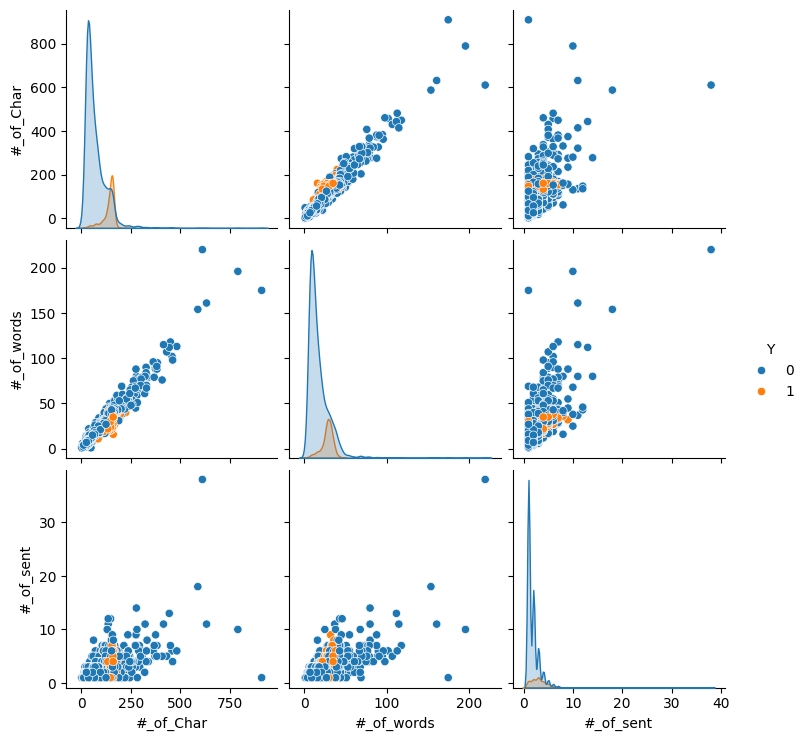

In [31]:
sns.pairplot(df ,hue='Y')

<Axes: >

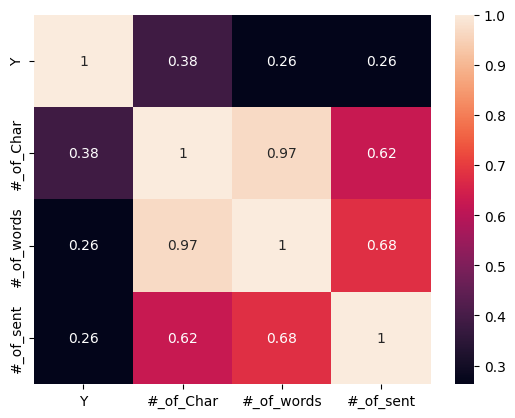

In [32]:
sns.heatmap(df[['Y','#_of_Char','#_of_words','#_of_sent']].corr(),annot=True)

**Text Preprocessing**
- convert into lowercase
- tokenization
- removing special characters
- removing punctuation and stop words 
- stemming

In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#nltk.download('stopwords')


In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)

    text = temp[:] # cloning
    temp = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    text = temp[:]
    temp = []

    for i in text:
        temp.append(ps.stem(i))

    return ' '.join(temp)

In [36]:
df['tran_text'] = df['Text'].apply(preprocess_text)

In [37]:
df.head(2)

,Y,Text,#_of_Char,#_of_words,#_of_sent,tran_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,background_color='black',min_font_size=10)

In [39]:
spam_wc = wc.generate(df[df['Y'] == 1]['tran_text'].str.cat(sep=' '))

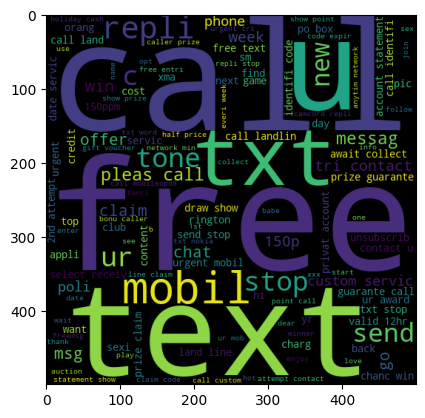

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['Y'] == 0]['tran_text'].str.cat(sep=' '))

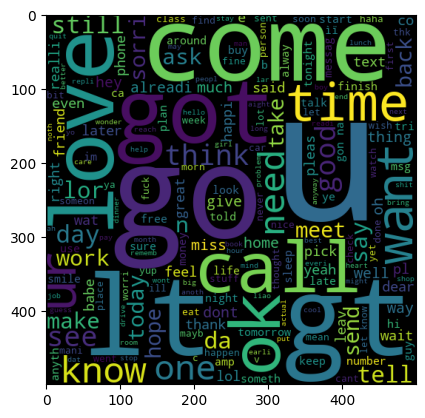

In [42]:
plt.imshow(ham_wc)

In [43]:
spam_corpus , ham_corpus = [] , []
for msg in df[df['Y'] == 1]['tran_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

for msg in df[df['Y'] == 0]['tran_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(spam_corpus)

9939

In [45]:
from collections import Counter
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))
ham_count = pd.DataFrame(Counter(ham_corpus).most_common(30))


In [46]:
spam_count.columns = ['word','count']
spam_count

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


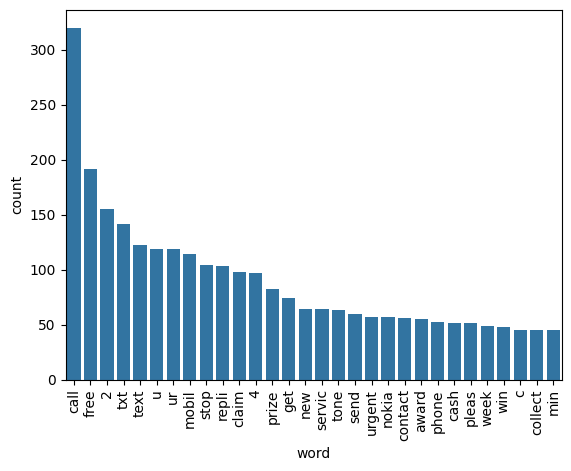

In [47]:
sns.barplot(data=spam_count,x='word',y='count')
plt.xticks(rotation = 'vertical')
plt.show()

In [48]:
ham_count.columns = ['word','count']

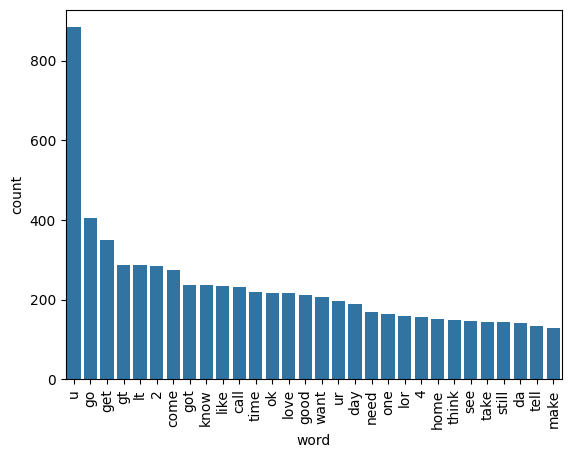

In [49]:
sns.barplot(data=ham_count,x='word',y='count')
plt.xticks(rotation = 'vertical')
plt.show()

**4. Model Building**

In [50]:
df.head()

,Y,Text,#_of_Char,#_of_words,#_of_sent,tran_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [52]:
X = tf.fit_transform(df['tran_text']).toarray()

In [53]:
X.shape

(5169, 6708)

In [54]:
Y = df['Y'].values

In [55]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

- **Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(x_train,y_train)
yhat_gnb = gnb.predict(x_test)
print(accuracy_score(y_pred=yhat_gnb,y_true=y_test))
print(precision_score(y_pred=yhat_gnb,y_true=y_test))
print(r2_score(y_pred=yhat_gnb,y_true=y_test))
print(confusion_matrix(y_true=y_test,y_pred=yhat_gnb))


0.8762088974854932
0.5231481481481481
-0.07039337474120089
[[793 103]
 [ 25 113]]


In [61]:
mnb.fit(x_train,y_train)
yhat_mnb = mnb.predict(x_test)
print(accuracy_score(y_pred=yhat_mnb,y_true=y_test))
print(precision_score(y_pred=yhat_mnb,y_true=y_test))
print(r2_score(y_pred=yhat_mnb,y_true=y_test))
print(confusion_matrix(y_true=y_test,y_pred=yhat_mnb))

0.9593810444874274
1.0
0.6487771739130435
[[896   0]
 [ 42  96]]


In [62]:
bnb.fit(x_train,y_train)
yhat_bnb = bnb.predict(x_test)
print(accuracy_score(y_pred=yhat_bnb,y_true=y_test))
print(precision_score(y_pred=yhat_bnb,y_true=y_test))
print(r2_score(y_pred=yhat_bnb,y_true=y_test))
print(confusion_matrix(y_true=y_test,y_pred=yhat_bnb))

0.9700193423597679
0.9734513274336283
0.7407641045548654
[[893   3]
 [ 28 110]]


**we chose tfidf with multinomial naive bayes**

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
tree = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear',penalty='l1')
rf = RandomForestClassifier(n_estimators=50,random_state=2)
ada = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
et = ExtraTreesClassifier(n_estimators=50,random_state=2)
gr = GradientBoostingClassifier(n_estimators=50,random_state=2)
xg = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
def model_training(clf , x_train , y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    yhat = clf.predict(x_test)

    accu = accuracy_score(y_pred=yhat,y_true=y_test)
    prec = precision_score(y_pred=yhat,y_true=y_test)

    return accu, prec

In [66]:
classifier = [svc,knc ,tree ,lr,rf ,ada ,bc,et ,gr ,xg ]
accu_list = []
prec_list = []

for i in classifier:
    acc , pre = model_training(i,x_train,y_train,x_test,y_test)
    accu_list.append(acc)
    prec_list.append(pre)


In [67]:
preform_df = pd.DataFrame({"Algorithm":classifier,
                            'Accuracy':accu_list ,
                            "Precision":prec_list})
preform_df.loc[len(preform_df)]= {"Algorithm":mnb,'Accuracy':0.9593810444874274,"Precision":1.0}

In [68]:
preform_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,KNeighborsClassifier(),0.900387,1.000000
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.971954,1.000000
10,MultinomialNB(),0.959381,1.000000
7,"(ExtraTreeClassifier(random_state=1872583848),...",0.972921,0.982456
0,"SVC(gamma=1.0, kernel='sigmoid')",0.972921,0.974138
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.961315,0.945455
9,"XGBClassifier(base_score=None, booster=None, c...",0.972921,0.943548
3,"LogisticRegression(penalty='l1', solver='libli...",0.951644,0.940000
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.952611,0.923810
6,(DecisionTreeClassifier(random_state=114693939...,0.958414,0.862595


In [69]:
tf = TfidfVectorizer()
X = tf.fit_transform(df['tran_text']).toarray()
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
acc1 , pre1 = model_training(mnb,x_train,y_train,x_test,y_test)
acc2 , pre2 = model_training(rf,x_train,y_train,x_test,y_test)
print(acc1,pre1)
print(acc2,pre2)


0.9593810444874274 1.0
0.971953578336557 1.0


In [70]:
from sklearn.ensemble import VotingClassifier


In [71]:
vt = VotingClassifier(estimators= [('rf' , rf),('nb',mnb)],voting='soft')
acc2 , pre2 = model_training(vt,x_train,y_train,x_test,y_test)
print(acc2,pre2)

0.9671179883945842 1.0


In [72]:
# import pickle
# pickle.dump(tf,open('vectorizer.pkl','wb'))
# pickle.dump(rf,open('model.pkl','wb'))
